In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
data=pd.read_csv("iris.csv")

In [47]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
#sns.heatmap(data=data)

In [51]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

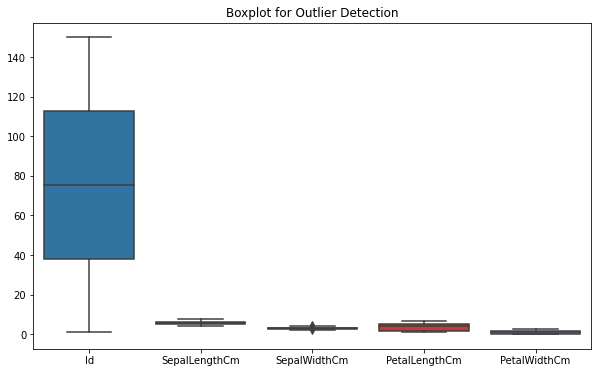

In [52]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot for Outlier Detection')
plt.show()

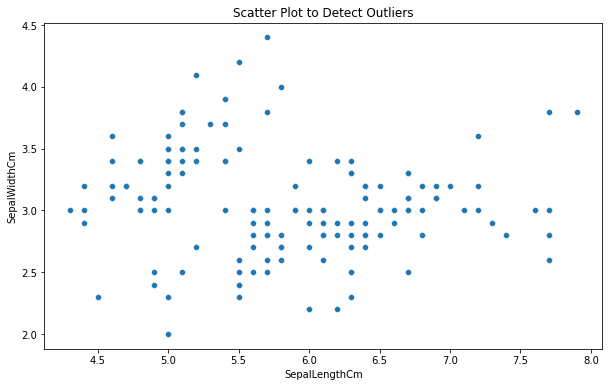

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm')
plt.title('Scatter Plot to Detect Outliers')
plt.show()


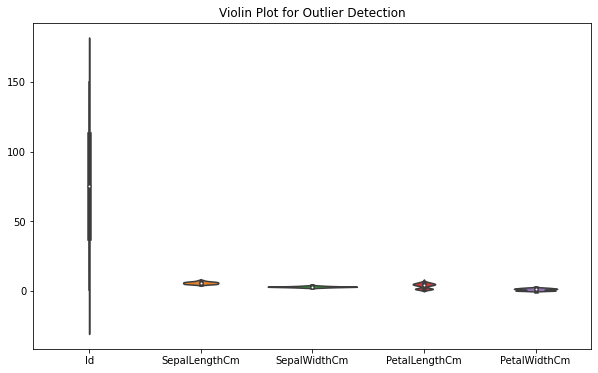

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
plt.title('Violin Plot for Outlier Detection')
plt.show()


In [55]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [56]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=data['Species']

In [57]:
# One-hot encoding the target
#y_encoded = pd.get_dummies(Y, drop_first=False)  # One-hot encode target

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [59]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [60]:
# Logistic Regression model (Multi-class)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [61]:
# Predicting on test data
y_pred = model.predict(X_test)

In [62]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.9733333333333334
